**Chapter 5 – Arbre de décision**
Cas de réglage des hyper-paramètres du modèle, avec la méthode gridSearch afin de trouver le meilleur modèle qu'on pourra tester...

In [1]:
#importatation de modules commun

import numpy as np
import pandas as pd

# pour la génération de seed
np.random.seed(4)

# pur l'affichage de figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#lecture des deux datasets Train_spam et Test_spam pour la détection de spam
#consulter le site de UCI pour avoir de l'information sur le data spambas
#https://archive.ics.uci.edu/ml/datasets/spambase
data_train = pd.read_csv("Train_spam.CSV")
data_test = pd.read_csv("Test_spam.CSV")

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              3680 non-null   float64
 1   word_freq_address           3680 non-null   float64
 2   word_freq_all               3680 non-null   float64
 3   word_freq_3d                3680 non-null   float64
 4   word_freq_our               3680 non-null   float64
 5   word_freq_over              3680 non-null   float64
 6   word_freq_remove            3680 non-null   float64
 7   word_freq_internet          3680 non-null   float64
 8   word_freq_order             3680 non-null   float64
 9   word_freq_mail              3680 non-null   float64
 10  word_freq_receive           3680 non-null   float64
 11  word_freq_will              3680 non-null   float64
 12  word_freq_people            3680 non-null   float64
 13  word_freq_report            3680 

In [4]:
data_train.shape

(3680, 58)

In [5]:
data_test.shape

(921, 58)

In [6]:
data_train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.09,0.0,0.09,0.0,0.39,0.09,0.09,0.00,0.19,0.29,...,0.000,0.139,0.0,0.310,0.155,0.0,6.813,494,1458,1
1,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.124,0.124,0.0,0.000,0.000,0.0,1.800,8,45,0
2,0.00,0.0,2.43,0.0,0.00,0.00,0.00,0.00,0.27,0.00,...,0.000,0.344,0.0,0.000,0.000,0.0,2.319,12,167,0
3,0.00,0.0,0.00,0.0,1.31,0.00,1.31,1.31,1.31,1.31,...,0.000,0.000,0.0,0.117,0.117,0.0,48.500,186,291,1
4,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.0,2.307,8,30,0


In [7]:
# Séparer les données des variables prédictives (X) 
# de la variable cible (Y)
X_train=data_train.iloc[:,:-1]
y_train=data_train['Class']

# Entrainement et visualisation

In [8]:
#Maintenant, nous pouvons entrainer  pour constuire un classeur : clf
#en utilisant le nouveau dataframe modifié.:

#l'option criterion : indique l'utilisation de l'entropie 
#comme heuristique pour le choix de la meilleure variable

from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

[Text(0.603125, 0.9166666666666666, 'char_freq_$ <= 0.056\nentropy = 0.963\nsamples = 3680\nvalue = [2257, 1423]'),
 Text(0.3625, 0.75, 'word_freq_remove <= 0.065\nentropy = 0.772\nsamples = 2779\nvalue = [2150, 629]'),
 Text(0.2, 0.5833333333333334, 'char_freq_! <= 0.197\nentropy = 0.627\nsamples = 2523\nvalue = [2127, 396]'),
 Text(0.1, 0.4166666666666667, 'word_freq_hp <= 0.025\nentropy = 0.4\nsamples = 2040\nvalue = [1878, 162]'),
 Text(0.05, 0.25, 'word_freq_george <= 0.005\nentropy = 0.531\nsamples = 1311\nvalue = [1153, 158]'),
 Text(0.025, 0.08333333333333333, 'entropy = 0.635\nsamples = 986\nvalue = [828, 158]'),
 Text(0.075, 0.08333333333333333, 'entropy = 0.0\nsamples = 325\nvalue = [325, 0]'),
 Text(0.15, 0.25, 'word_freq_receive <= 1.115\nentropy = 0.049\nsamples = 729\nvalue = [725, 4]'),
 Text(0.125, 0.08333333333333333, 'entropy = 0.027\nsamples = 727\nvalue = [725, 2]'),
 Text(0.175, 0.08333333333333333, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3, 0.41666

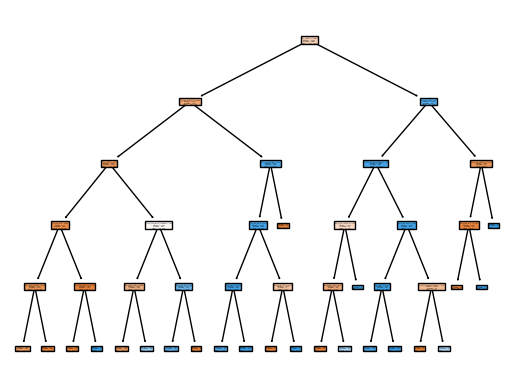

In [9]:
#affichage de l'arbre
from sklearn.tree import plot_tree
plot_tree(clf, feature_names=list(data_train.columns[:-1]), filled=True)

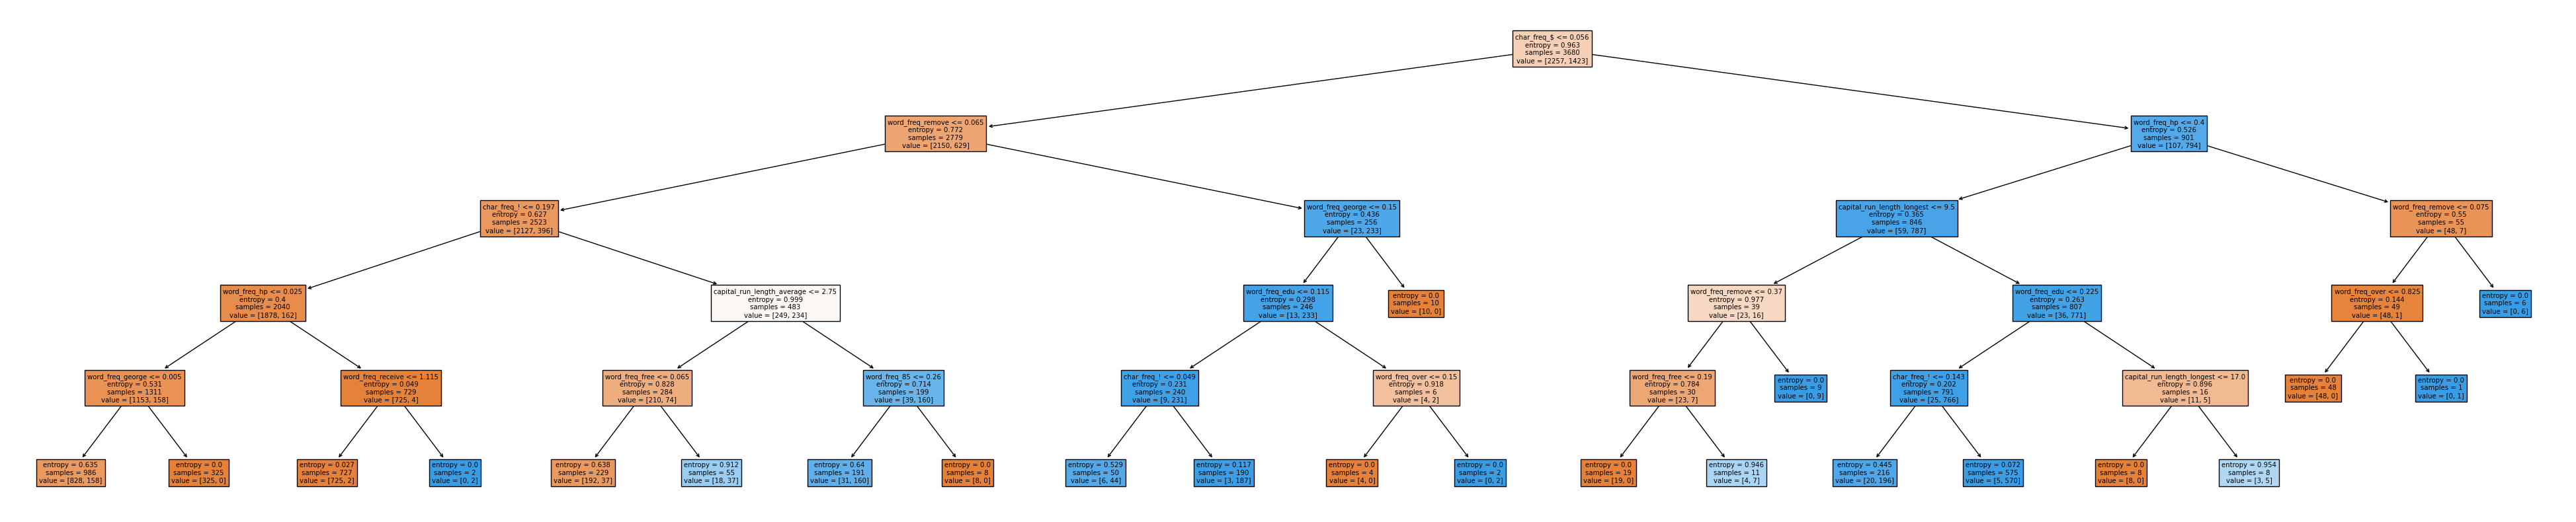

In [10]:
#affichage avec une meilleure visibilité
import matplotlib.pyplot as plt
plt.figure(figsize=(50,10))
plot_tree(clf, feature_names=list(data_train.columns),filled=True)
plt.show()

In [11]:
#Pour avoir une idée sur les variables impliquées
#Nous récupérons le champ "feature_importances_" de la structure de l'arbre
#que nous plaçons dans un dataframe 
#pour pouvoir afficher les contributions des variables associées 
#à leurs noms, et triées de manière décroissante.
#les variables qui apparaissent dans l'arbres sont celles dont l'importance est
#est différent de zéro.

ImportanceVariables={"Variable":data_train.columns[:-1],
                         "Importance":clf.feature_importances_}
print(pd.DataFrame(ImportanceVariables).sort_values(by="Importance",ascending=False))

                      Variable  Importance
52                 char_freq_$    0.389473
6             word_freq_remove    0.205799
51                 char_freq_!    0.131513
24                word_freq_hp    0.092343
26            word_freq_george    0.045559
54  capital_run_length_average    0.044476
55  capital_run_length_longest    0.027419
15              word_freq_free    0.021850
45               word_freq_edu    0.021220
34                word_freq_85    0.008362
10           word_freq_receive    0.006699
5               word_freq_over    0.005288
39            word_freq_direct    0.000000
38                word_freq_pm    0.000000
35        word_freq_technology    0.000000
37             word_freq_parts    0.000000
36              word_freq_1999    0.000000
41           word_freq_meeting    0.000000
40                word_freq_cs    0.000000
0               word_freq_make    0.000000
42          word_freq_original    0.000000
43           word_freq_project    0.000000
44         

## Validation avec un jeu de test

Validation du classeur clf avec le jeu de test.
Il faut s'assurer que le jeu de test est dans la même configuration


In [12]:
#séparons les donnees de test des variables prédictives de celles 
#de la variable cible

X_test=data_test.iloc[:,:-1]
y_test=data_test['Class']

In [13]:
#Voici un exemple de résultat de test avec le modele clf obtenu initialement 
# avec les données de test

from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

# le résultat est de l'ordre de 100%
#c'est normal car le modele a été entrainé 
#et testé avec les même données !

0.9022801302931596

# Amélioration :Hyperparamètres de régulation

Utilisation de la méthode "GridSearchCV" 
avec la validation croisée pour trouver la meilleure valeur de 
l'hyerparametre 'max_depth' d'un classeur de type arbre de décision.
On peut aussi faire le calibrage avec d'autres hyperparametres.
Voir les options dans scikit-learn de la classe DecisionTreeClassifier

In [14]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': list(range(2, 20)), 'min_samples_split': [10, 15, 20]}


grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'min_samples_split': [10, 15, 20]},
             verbose=1)

In [15]:
#le meilleur estimateur (modele) trouvé est:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_split=15, random_state=42)

Il a fait une sorte d'optimisation du modele clf obtenu auparavant
au lieu d'avoir une profondeur 5, une valeur par défaut. Il a trouvé une bonne valeur à 9.
Maintenant, on peut faire évaluer le meilleur modèle trouvé à l'étape précédente par le GridSearcCV en utilisant le jeu de test.

In [15]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

#Voici le résultat de la performance qui est de l'ordre:

0.9239956568946797

In [16]:
#on passse d'une performance de l'ordre de 90% à 92%, un gain de 2% grace au réglage des hyper-paramètres. A voir au prochain cours